In [14]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [21]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader("sample-p16-a65536-trandom.cali")

In [17]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

8.076 main
├─ 0.567 MPI_Barrier
├─ 0.225 MPI_Bcast
├─ 0.011 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.107 MPI_Reduce
├─ 0.107 comm
│  └─ 0.104 comm_small
│     └─ 0.101 MPI_Gather
├─ 5.160 comp
│  ├─ 3.177 comp_large
│  │  ├─ 0.815 MPI_Gatherv
│  │  └─ nan comp_large
│  │     └─ nan comp
│  │        ├─ nan MPI_Comm_dup
│  │        ├─ nan MPI_Finalize
│  │        ├─ nan MPI_Finalized
│  │        ├─ nan MPI_Initialized
│  │        ├─ nan MPI_Reduce
│  │        ├─ nan comm
│  │        │  ├─ nan comm_large
│  │        │  │  └─ nan MPI_Gatherv
│  │        │  └─ nan comm_small
│  │        │     └─ nan MPI_Gather
│  │        ├─ nan comp
│  │        │  └─ nan comp_small
│  │        └─ nan correctness_check
│  └─ 1.980 comp_small
│     └─ 1.976 MPI

View Calltree

In [4]:
extracted_md = tk.metadata[['algorithm', 'programming_model', 'data_type', 'size_of_data_type', 
          'input_size', 'input_type', 'num_procs', 'scalability', 
          'group_num', 'implementation_source']]
#print(extracted_md.to_markdown(index=False))

In [5]:
tk.metadata_column_to_perfdata("algorithm")
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["algorithm", "num_procs", "input_size", "input_type"]).sort_index()

In [11]:
perfdata = tk.dataframe.where(tk.dataframe['name'] == 'comp_large')
perfdata = perfdata.reset_index()
perfdata = perfdata[perfdata['profile'].notna()]
display(perfdata)

,algorithm,num_procs,input_size,input_type,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name
13,merge,2,65536,Random,"{'name': 'comp_large', 'type': 'function'}",2.612051e+09,6.0,regionprofile,0.100085,0.100551,0.100318,0.200636,0.000000,0.024137,0.098633,0.061385,0.122770,5.0,5.0,5.0,10.0,comp_large
15,merge,2,65536,Random,"{'name': 'comp_large', 'type': 'function'}",2.612051e+09,15.0,regionprofile,0.001302,0.076260,0.038781,0.077562,0.001405,0.000005,0.000006,0.000006,0.000011,NaN,NaN,NaN,NaN,comp_large
49,sample,2,65536,1_perc_perturbed,"{'name': 'comp_large', 'type': 'function'}",3.220525e+09,6.0,regionprofile,0.012980,0.013336,0.013158,0.026316,0.000000,0.012925,0.013278,0.013102,0.026203,6.0,6.0,6.0,12.0,comp_large
85,sample,2,65536,Random,"{'name': 'comp_large', 'type': 'function'}",3.200134e+09,6.0,regionprofile,0.031527,0.032163,0.031845,0.063690,0.000000,0.030547,0.031190,0.030869,0.061737,6.0,6.0,6.0,12.0,comp_large
121,sample,2,65536,ReverseSorted,"{'name': 'comp_large', 'type': 'function'}",2.917313e+09,6.0,regionprofile,0.012382,0.038212,0.025297,0.050595,0.000167,0.012142,0.037970,0.025056,0.050112,6.0,6.0,6.0,12.0,comp_large
157,sample,2,65536,Sorted,"{'name': 'comp_large', 'type': 'function'}",2.197178e+09,6.0,regionprofile,0.013454,0.014182,0.013818,0.027636,0.000000,0.013407,0.014130,0.013769,0.027537,6.0,6.0,6.0,12.0,comp_large
193,sample,2,262144,1_perc_perturbed,"{'name': 'comp_large', 'type': 'function'}",3.370249e+09,6.0,regionprofile,0.058685,0.059191,0.058938,0.117876,0.000000,0.058586,0.059091,0.058838,0.117677,6.0,6.0,6.0,12.0,comp_large
229,sample,2,262144,Random,"{'name': 'comp_large', 'type': 'function'}",1.411802e+09,6.0,regionprofile,0.114207,0.116612,0.115410,0.230819,0.000001,0.113906,0.116308,0.115107,0.230214,6.0,6.0,6.0,12.0,comp_large
265,sample,2,262144,ReverseSorted,"{'name': 'comp_large', 'type': 'function'}",2.560726e+09,6.0,regionprofile,0.054620,0.171338,0.112979,0.225957,0.003406,0.054089,0.170804,0.112446,0.224893,6.0,6.0,6.0,12.0,comp_large
301,sample,2,262144,Sorted,"{'name': 'comp_large', 'type': 'function'}",4.131994e+09,6.0,regionprofile,0.057569,0.058781,0.058175,0.116350,0.000000,0.057459,0.058666,0.058063,0.116125,6.0,6.0,6.0,12.0,comp_large


In [7]:
tk.dataframe.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10116 entries, ('merge', 2, 65536, 'Random') to ('sample', 1024, 268435456, 'Sorted')
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   node                 10116 non-null  object 
 1   profile              10116 non-null  int64  
 2   nid                  5909 non-null   float64
 3   spot.channel         5909 non-null   object 
 4   Min time/rank        5909 non-null   float64
 5   Max time/rank        5909 non-null   float64
 6   Avg time/rank        5909 non-null   float64
 7   Total time           5909 non-null   float64
 8   Variance time/rank   5909 non-null   float64
 9   Min time/rank (exc)  5909 non-null   float64
 10  Max time/rank (exc)  5909 non-null   float64
 11  Avg time/rank (exc)  5909 non-null   float64
 12  Total time (exc)     5909 non-null   float64
 13  Calls/rank (min)     5626 non-null   float64
 14  Calls/rank (avg)     5626 

In [8]:
import os

def save_fig(path : str, filename : str):
    path_dirs = path.split('/')
    for i in range(len(path_dirs)):
        intermediate_path = '/'.join(path_dirs[:i+1])
        if not os.path.exists(intermediate_path):
            os.mkdir(intermediate_path)
    plt.savefig(os.path.join(path, filename))

def plot_rank_times(input_size: int, df_by_size: pd.DataFrame, input_types: list, algorithm: str, show=True, save=False):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Impact of Processors on Time / Rank (Input Size = {input_size})')

    for i, input_type in enumerate(input_types):
        df_by_type = df_by_size[df_by_size['input_type'] == input_type]

        num_procs = df_by_type['num_procs']
        min_time = df_by_type['Min time/rank']
        avg_time = df_by_type['Avg time/rank']
        max_time = df_by_type['Max time/rank']

        ax = axs[i // 2, i % 2]
        ax.plot(num_procs, min_time, label='Min time/rank', marker='o')
        ax.plot(num_procs, avg_time, label='Avg time/rank', marker='o')
        ax.plot(num_procs, max_time, label='Max time/rank', marker='o')

        ax.set_title(f'Input Type: {input_type}')
        ax.set_xlabel('Number of Processors')
        ax.set_ylabel('Time (s)')
        ax.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if save:
        save_fig(f'plots/{algorithm}', f'{algorithm}_performance_rank_a{input_size}.png')
    if show:
        plt.show()

def plot_total_time(input_size: int, df_by_size: pd.DataFrame, input_types: list, algorithm: str, show=True, save=False):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_title(f'Impact of Processors on Total Time (Input Size = {input_size})')
    
    for input_type in input_types:
        df_by_type = df_by_size[df_by_size['input_type'] == input_type]
        total_time = df_by_type.groupby('num_procs')['Total time'].mean()
        ax.plot(total_time.index, total_time.values, label=f'Total time ({input_type})', marker='o')

    ax.set_xlabel('Number of Processors')
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.tight_layout()
    if save:
        save_fig(f'plots/{algorithm}', f'{algorithm}_performance_total_a{input_size}.png')
    if show:
        plt.show()

def plot_variance_time(input_size: int, df_by_size: pd.DataFrame, input_types: list, algorithm: str, show=True, save=False):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_title(f'Impact of Processors on Variance Time/Rank (Input Size = {input_size})')
    
    for input_type in input_types:
        df_by_type = df_by_size[df_by_size['input_type'] == input_type]
        variance_time = df_by_type.groupby('num_procs')['Variance time/rank'].mean()
        ax.plot(variance_time.index, variance_time.values, label=f'Variance time ({input_type})', marker='o')

    ax.set_xlabel('Number of Processors')
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.tight_layout()
    if save:
        save_fig(f'plots/{algorithm}', f'{algorithm}_performance_variance_a{input_size}.png')
    if show:
        plt.show()

def plot_process_performance(perfdata : pd.DataFrame, algorithm : str, show=True, save=False):
    bitonic_df = perfdata[perfdata['algorithm'] == algorithm]
    
    input_sizes = bitonic_df['input_size'].unique()
    input_types = bitonic_df['input_type'].unique()

    for input_size in input_sizes:
        df_by_size = bitonic_df[bitonic_df['input_size'] == input_size]
        
        plot_rank_times(input_size, df_by_size, input_types, algorithm, show, save)
        plot_total_time(input_size, df_by_size, input_types, algorithm, show, save)
        plot_variance_time(input_size, df_by_size, input_types, algorithm, show, save)
        
def plot_comm(input_size: int, df_by_size: pd.DataFrame, input_types: list, algorithm: str, show=True, save=False):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.set_title(f'Impact of Processors on Communication (Input Size = {input_size})')
    
    for input_type in input_types:
        df_by_type = df_by_size[df_by_size['input_type'] == input_type]
        total_time = df_by_type.groupby('num_procs')['node'][].mean()
        ax.plot(total_time.index, total_time.values, label=f'Total time ({input_type})', marker='o')

    ax.set_xlabel('Number of Processors')
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.tight_layout()
    if save:
        save_fig(f'plots/{algorithm}', f'{algorithm}_performance_total_a{input_size}.png')
    if show:
        plt.show()

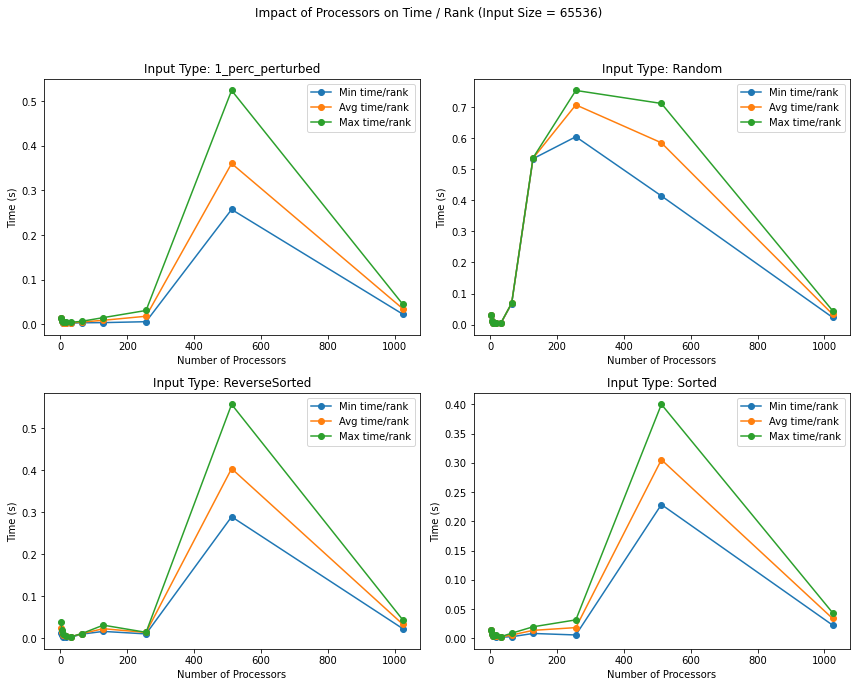

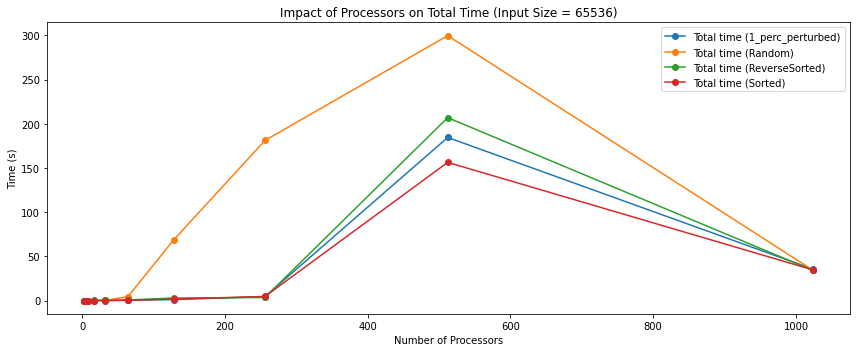

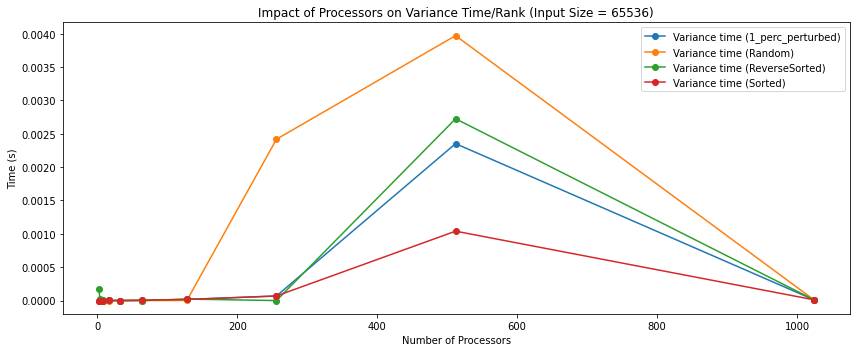

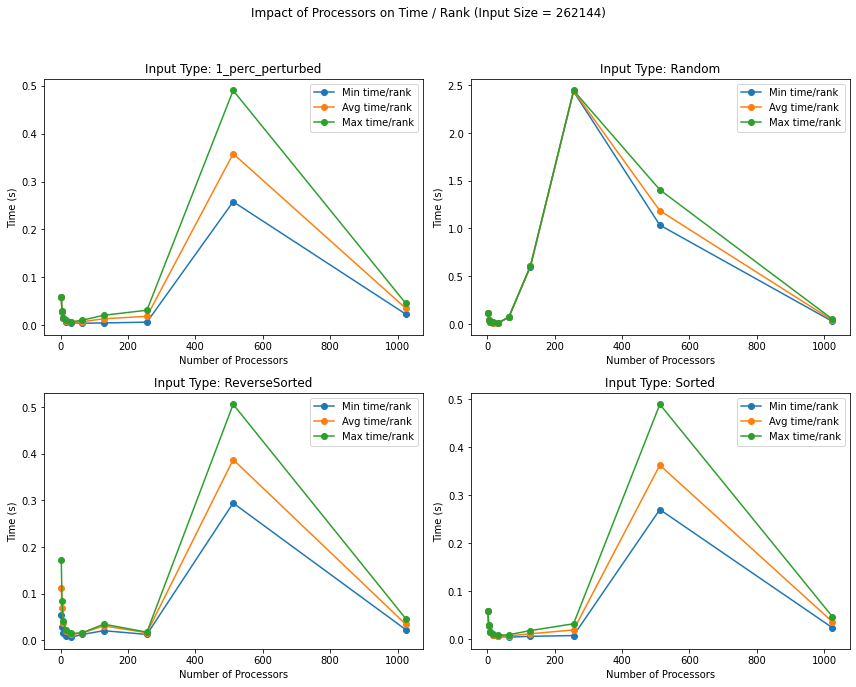

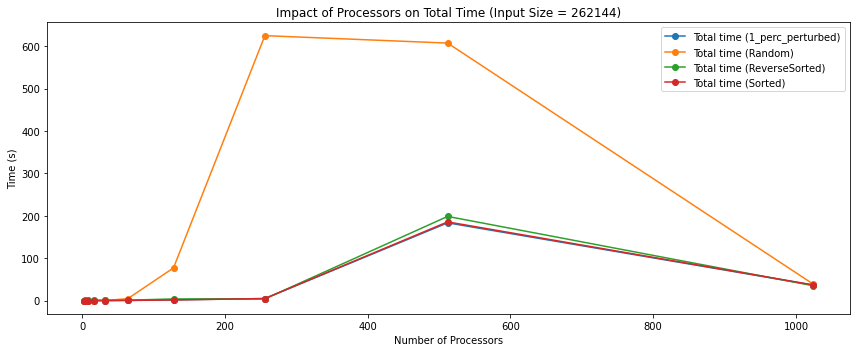

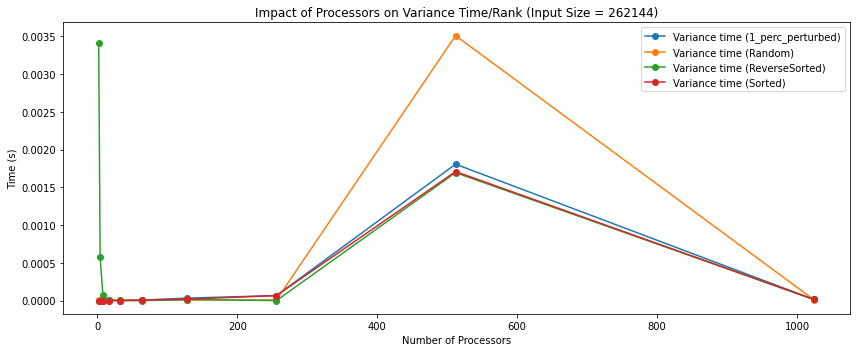

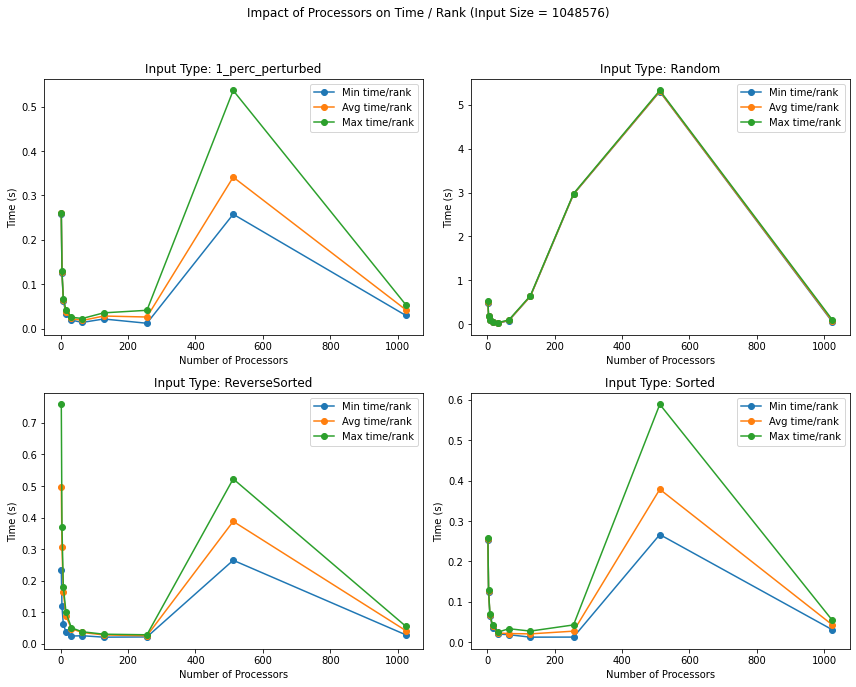

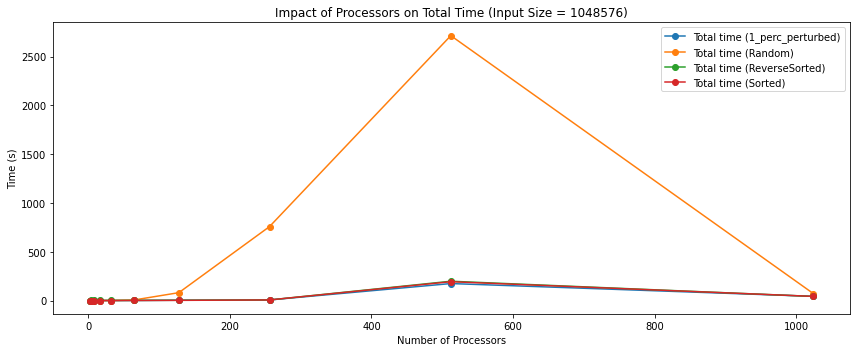

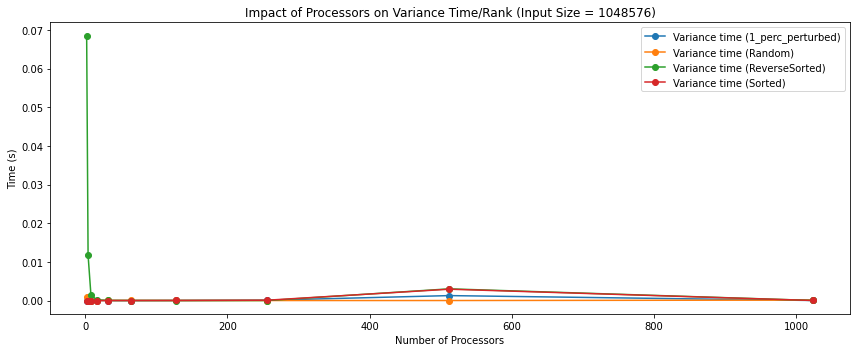

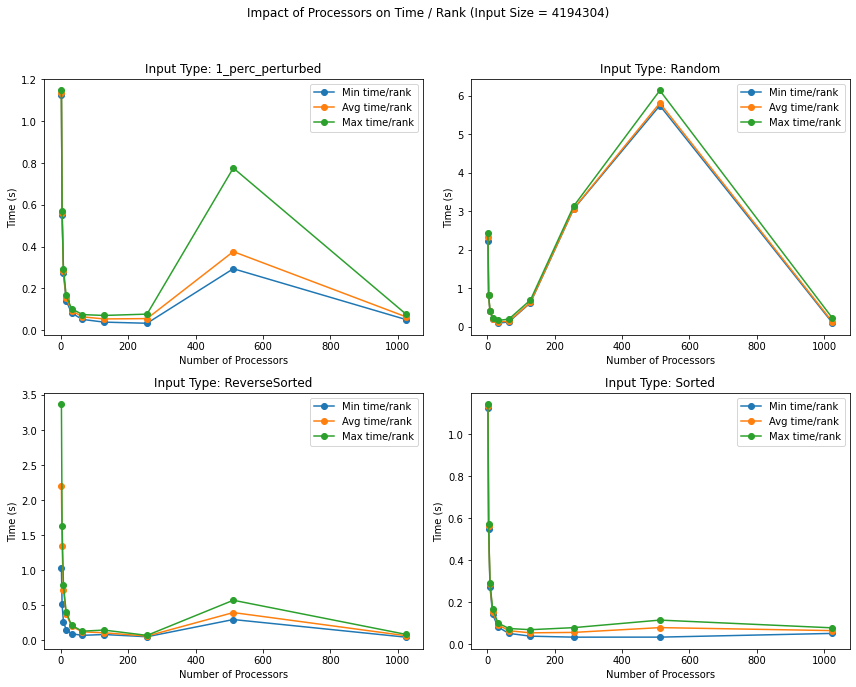

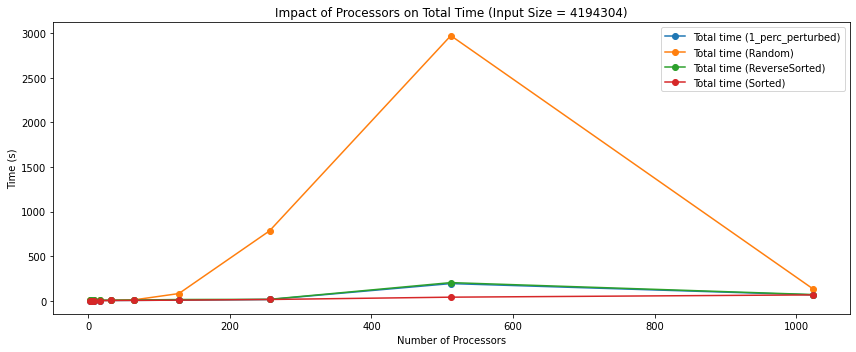

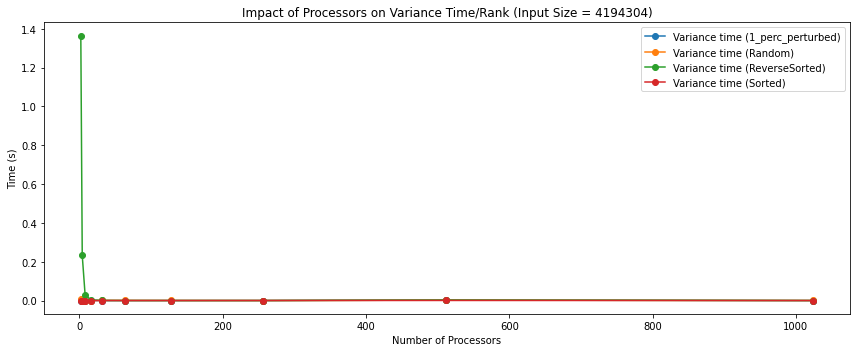

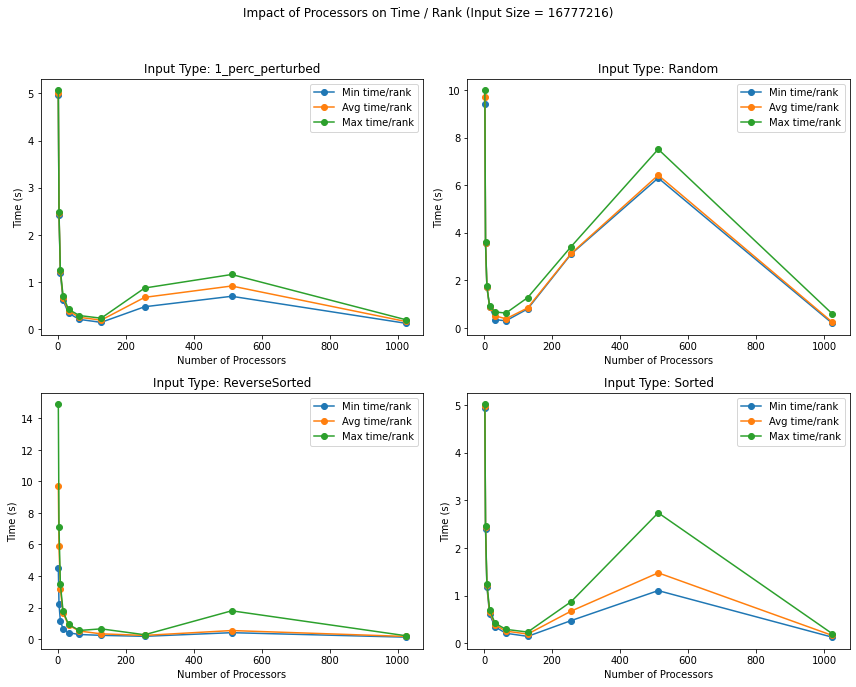

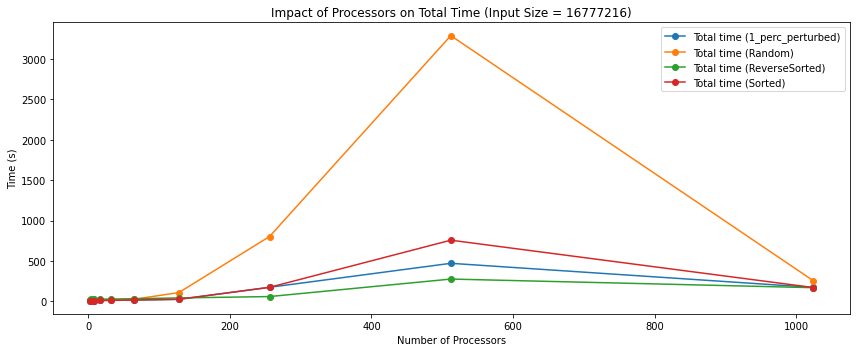

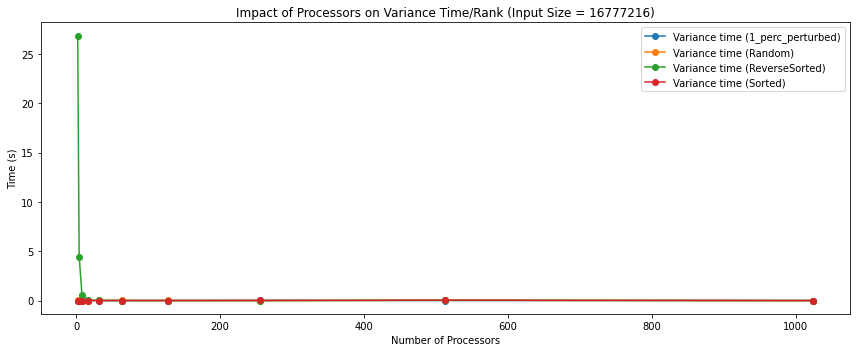

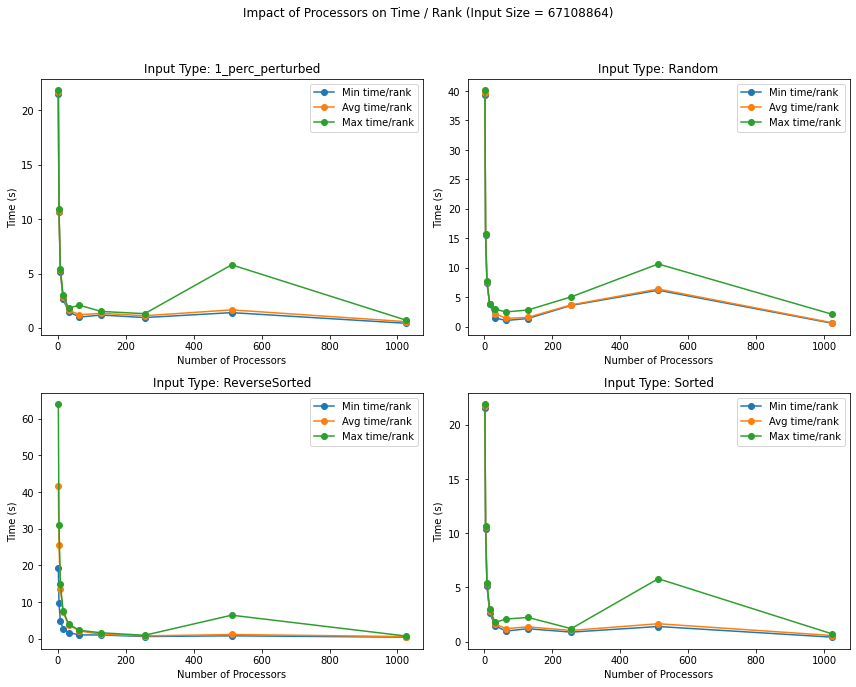

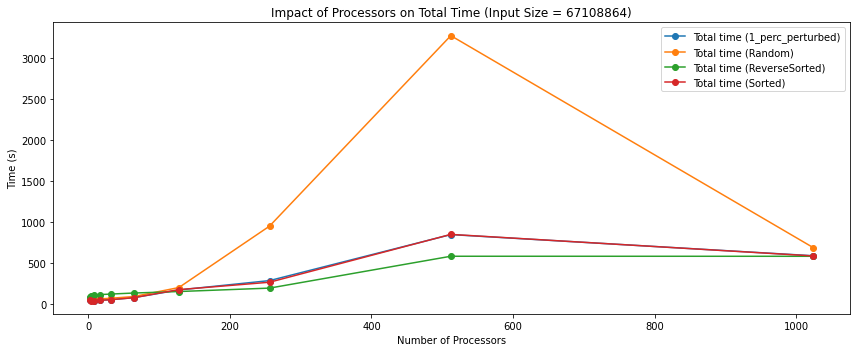

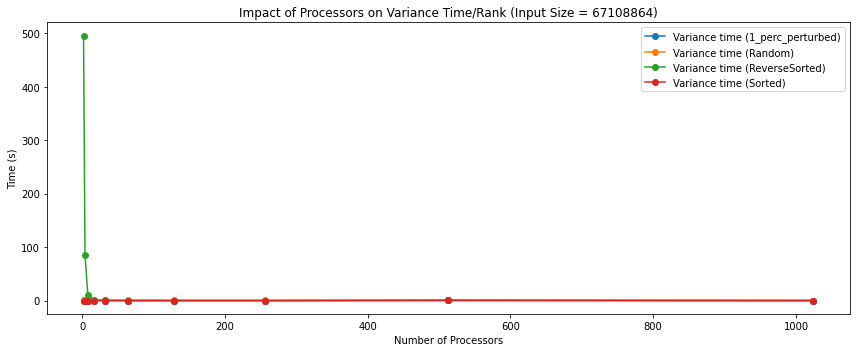

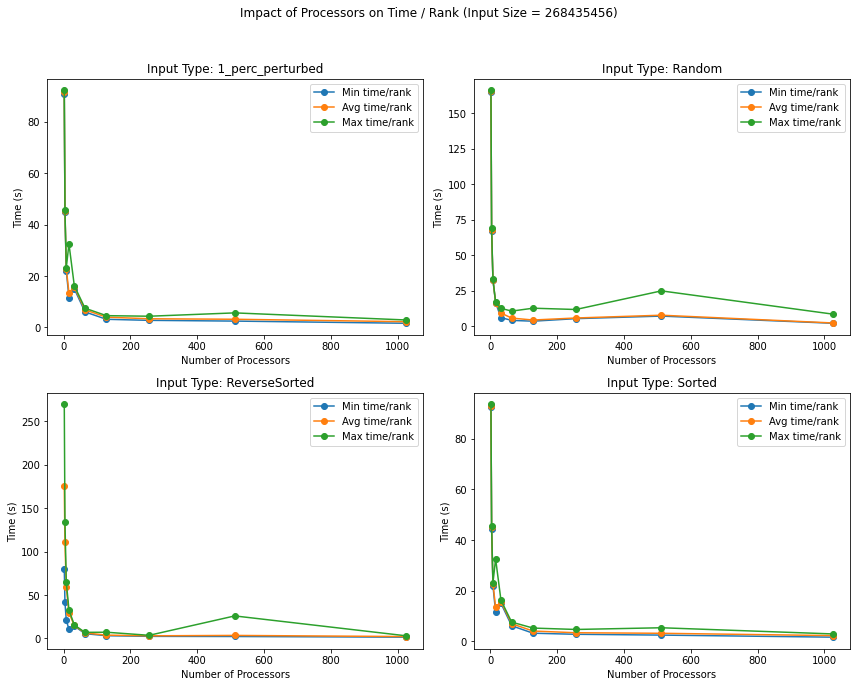

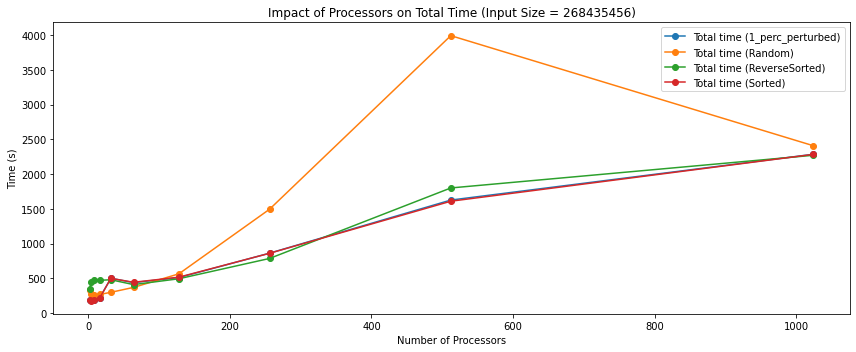

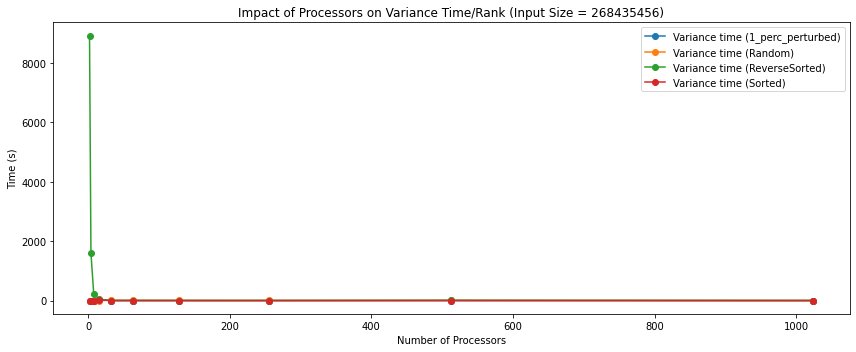

In [9]:
plot_process_performance(perfdata, 'sample', show=True, save=True)
